In [7]:
## Charlie Boye Section A

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [16]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd
import matplotlib.pyplot as plt

# Load the data iusing the read_csv() function
df = pd.read_csv('titanic.csv')
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [19]:
# How many passengers are recorded in this log?
print(df.shape[0])
# 891

# What percentage are male?
print((df['Sex'] == 1).mean())
# 0.6475869809203143 (64.76%) 

# What percentage survived?
print(df['Survived'].mean())
# 0.3838383838383838 (38.38%)

891
0.6475869809203143
0.3838383838383838


Your written answer:

 - 891 Passengers
 - 64.76% were male
 - 38.38% passengers survived

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [24]:
# What percentage of female passengers survived?
print((df['Survived'][df['Sex'] == 0]).mean())

# What percentage of male passengers survived?
print((df['Survived'][df['Sex'] == 1]).mean())

0.7420382165605095
0.18890814558058924


Your written answer:

 - 74.2% of female passengers survived.
 - 18.9% of male passengers survived.

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [32]:
tickets = df.groupby('Pclass').agg(
    total_tickets=('Pclass', 'size'),
    survivorship_percentage=('Survived', 'mean')
)

tickets['percentage_of_total'] = (tickets['total_tickets'] / df.shape[0]) * 100

print(tickets)

        total_tickets  survivorship_percentage  percentage_of_total
Pclass                                                             
1                 216                 0.629630            24.242424
2                 184                 0.472826            20.650954
3                 491                 0.242363            55.106622


Your written answer:

 - Class 1 
    - % tickets: 24.24%
    - % survivorship: 62.96%
- Class 2 
    - % tickets: 20.65%
    - % survivorship: 47.28%
- Class 3
    - % tickets: 55.11%
    - % survivorship: 24.24%


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

    Age                                               Name  Sex
1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
2  26.0                             Heikkinen, Miss. Laina    0
3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0
    Age                            Name  Sex
0  22.0         Braund, Mr. Owen Harris    1
4  35.0        Allen, Mr. William Henry    1
5  30.0                Moran, Mr. James    1
6  54.0         McCarthy, Mr. Timothy J    1
7   2.0  Palsson, Master. Gosta Leonard    1


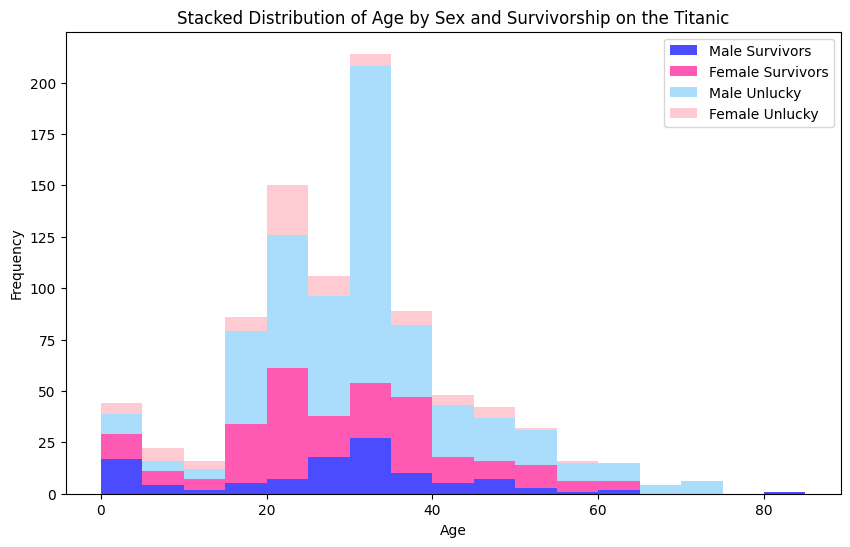

In [17]:
survivors = df[df['Survived'] == 1][['Age', 'Name', 'Sex']]
unlucky = df[df['Survived'] == 0][['Age', 'Name', 'Sex']]

print(survivors.head())
print(unlucky.head())

plt.figure(figsize=(10, 6))

male_survivors = survivors[survivors['Sex'] == 1]['Age'].dropna()
female_survivors = survivors[survivors['Sex'] == 0]['Age'].dropna()

male_unlucky = unlucky[unlucky['Sex'] == 1]['Age'].dropna()
female_unlucky = unlucky[unlucky['Sex'] == 0]['Age'].dropna()

bins = range(0, 90, 5)

plt.hist(
    [male_survivors, female_survivors, male_unlucky, female_unlucky],
    bins=bins,
    stacked=True,
    color=['blue', 'deeppink', 'lightskyblue', 'lightpink'],
    label=['Male Survivors', 'Female Survivors', 'Male Unlucky', 'Female Unlucky'],
    alpha=0.7
)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Stacked Distribution of Age by Sex and Survivorship on the Titanic")
plt.legend()

plt.show()


### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

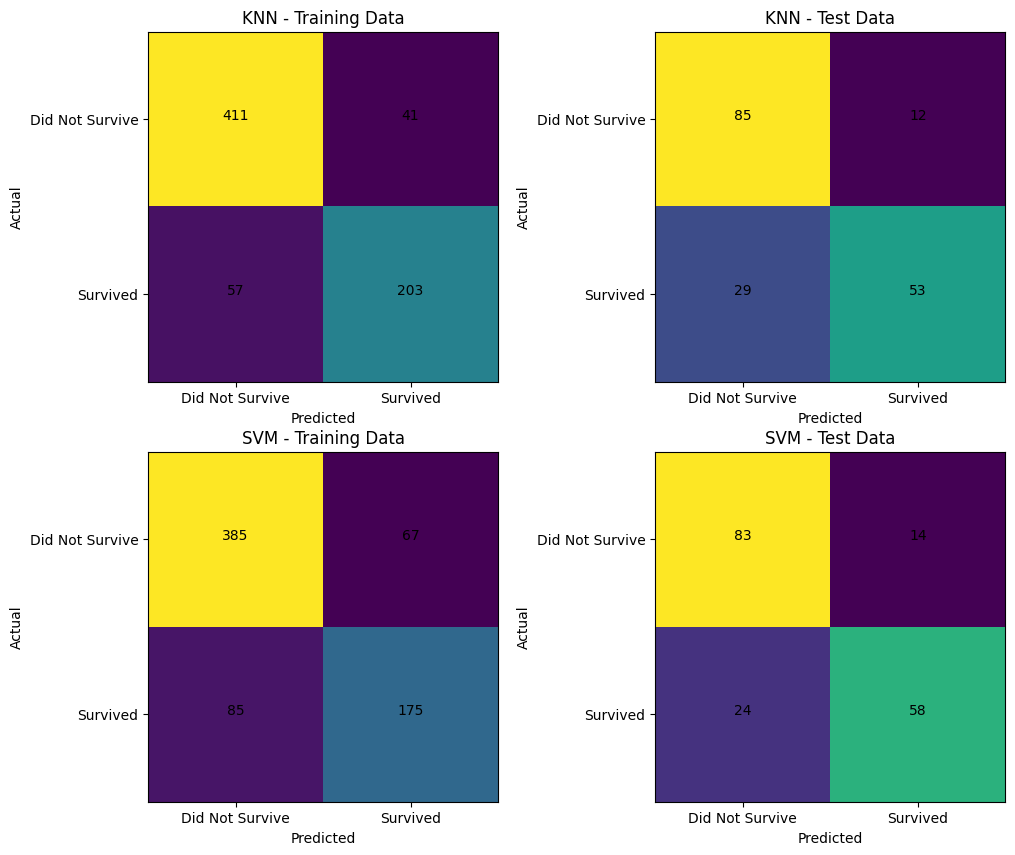

KNN Training Accuracy: 0.8623595505617978
KNN Test Accuracy: 0.770949720670391
SVM Training Accuracy: 0.7865168539325843
SVM Test Accuracy: 0.7877094972067039


In [73]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

X = df[['Pclass', 'Age', 'Sex', 'SibSp']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', C=1)

knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

y_knn_train = knn.predict(X_train)
y_knn_test = knn.predict(X_test)

y_svm_train = svm.predict(X_train)
y_svm_test = svm.predict(X_test)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
titles = ["KNN - Training Data", "KNN - Test Data", "SVM - Training Data", "SVM - Test Data"]
predictions = [(y_train, y_knn_train), (y_test, y_knn_test), (y_train, y_svm_train), (y_test, y_svm_test)]

# I feel like this might have been more work but it looks pretty :D
for ax, (y_true, y_pred), title in zip(axes.flatten(), predictions, titles):
    cm = confusion_matrix(y_true, y_pred)
    ax.imshow(cm, interpolation='nearest')
    ax.set_title(title)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Did Not Survive', 'Survived'])
    ax.set_yticklabels(['Did Not Survive', 'Survived'])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha='center', color='black')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

plt.show()

print("KNN Training Accuracy:", accuracy_score(y_train, y_knn_train))
print("KNN Test Accuracy:", accuracy_score(y_test, y_knn_test))
print("SVM Training Accuracy:", accuracy_score(y_train, y_svm_train))
print("SVM Test Accuracy:", accuracy_score(y_test, y_svm_test))


#### **Questions**

How does the model performance on the test data compare to the performance on the training data?
- KNN Test Accuracy: 0.83
- KNN Training Accuracy: 0.86  
    (KNN: test was 0.03 less than train)

- SVM Test Accuracy: 0.78
- SVM Training Accuracy: 0.79  
    (SVM: test was 0.01 less than train)

Which models did you fit and which worked better?
- I fit the KNN and SVM models
- The KNN model performed better with a higher accuracy than the SVM.